## Visualize image-specific class saliency with backpropagation

---

The gradients obtained can be used to visualise an image-specific class saliency map, which can gives some intuition on regions within the input image that contribute the most (and least) to the corresponding output.

More details on saliency maps: [Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps](https://arxiv.org/pdf/1312.6034.pdf).


from https://github.com/MisaOgura/flashtorch 
run under pyFlashTorch

### 0. Set up

In [12]:
!pip install torch==1.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.0/752.0 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.14.1+cu116 requires torch==1.13.1, but you have torch 1.5.0 which is incompatible.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.5.0 which is incompatible.
torchaudio 0.13.1+cu116 requires torch==1.13.1, but you have torch 1.5.0 which is incompatible.
fastai 2.7.10 requires torch<1.14,>=1.7, but you have torch 1.5.0 which is incompatible.


In [13]:
!pip install torchvision==0.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 45.2 MB/s eta 0:00:00
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.10 requires torch<1.14,>=1.7, but you have torch 1.5.0 which is incompatible.
fastai 2.7.10 requires torchvision>=0.8.2, but you have torchvision 0.6.0 which is incompatible.


In [14]:
# Install flashtorch if you don't have it

!pip install flashtorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import torchvision.models as models

from flashtorch.utils import apply_transforms, load_image
from flashtorch.saliency import Backprop

### 1. Load an image 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/teaching/CS827/my practicals/

/content/drive/MyDrive/teaching/CS827/my practicals


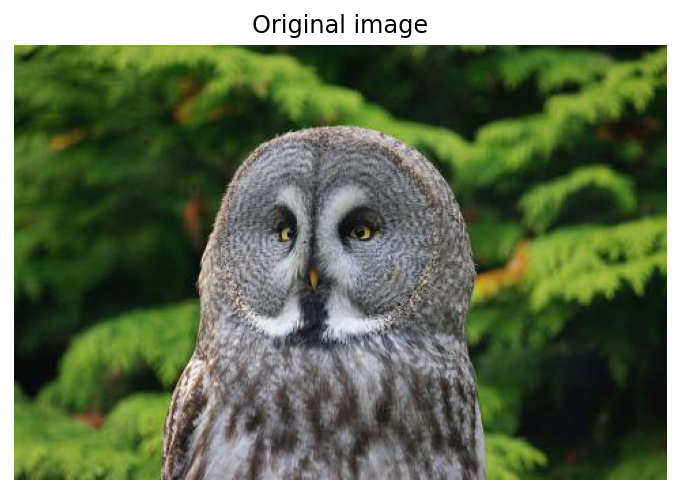

In [4]:
image = load_image('./images/great_grey_owl.jpg')

plt.imshow(image)
plt.title('Original image')
plt.axis('off');

### 2. Load a pre-trained Model

In [5]:
model = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

### 3. Create an instance of Backprop with the model

In [6]:
backprop = Backprop(model)

### 4. Visualize saliency maps

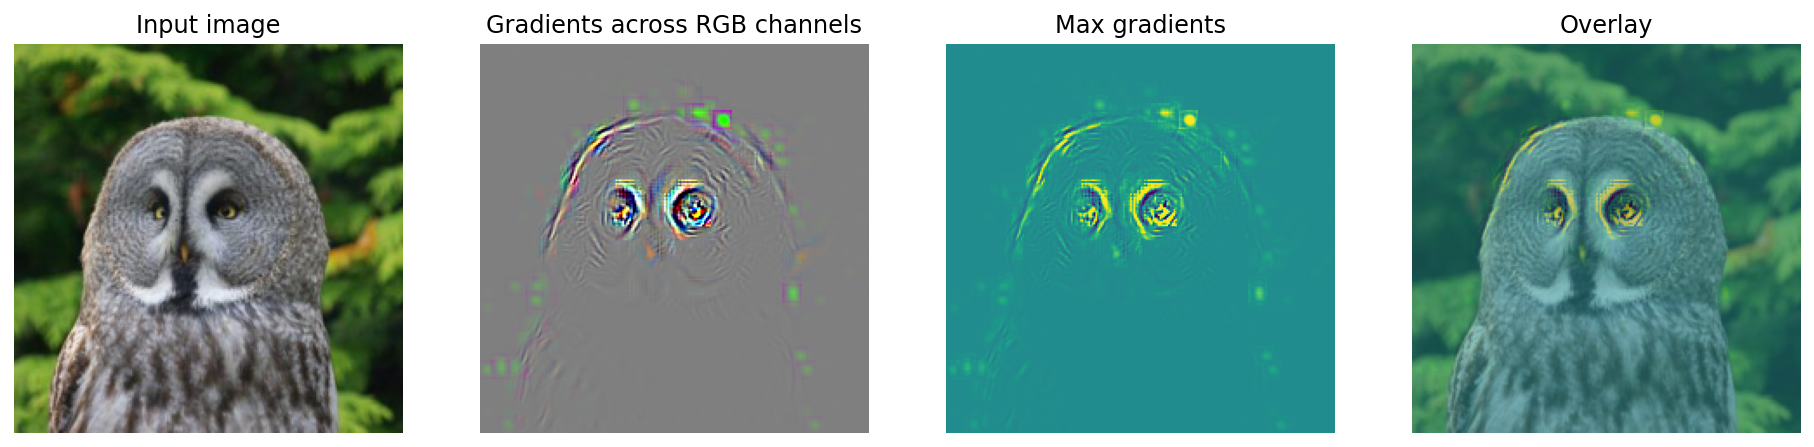

In [7]:
# Transform the input image to a tensor

owl = apply_transforms(image)

# Set a target class from ImageNet task: 24 in case of great gray owl

target_class = 24

# Ready to roll!
backprop.visualize(owl, target_class, guided=True)

### 5. What about other birds?

What makes peacock a peacock...?

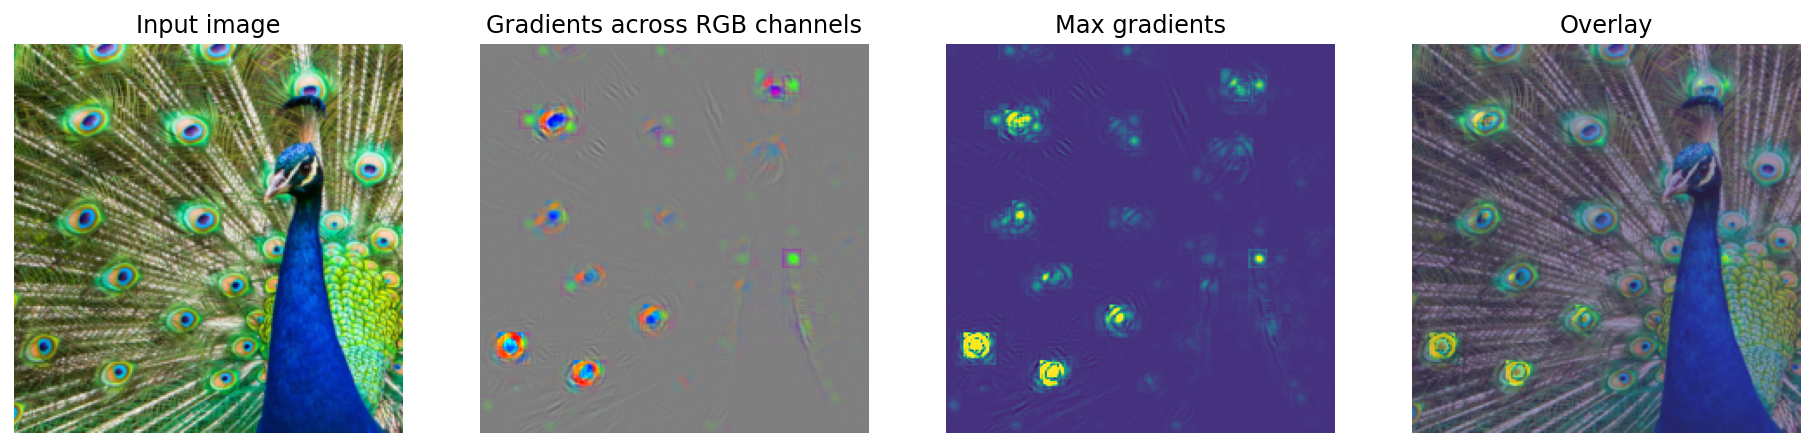

In [8]:
peacock = apply_transforms(load_image('./images/peacock.jpg'))
backprop.visualize(peacock, 84, guided=True)

Or a toucan?

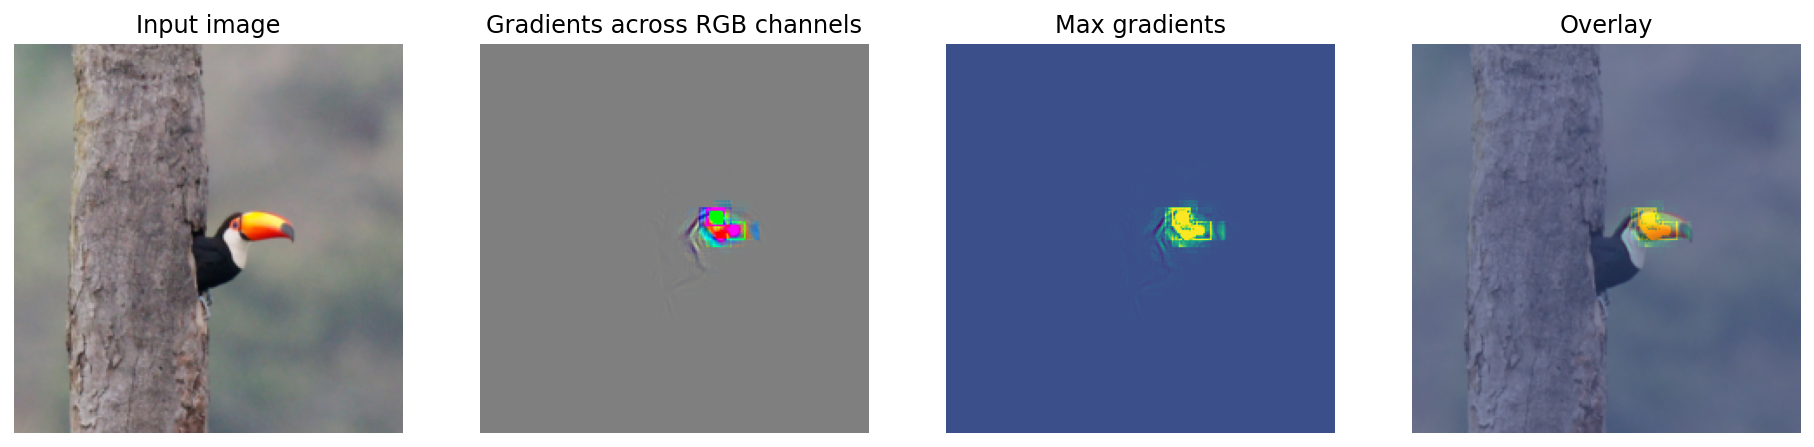

In [12]:
toucan = apply_transforms(load_image('./images/toucan.jpg'))
backprop.visualize(toucan, 96, guided=True)

Please try out other models/images too!